In [13]:
#data from here:
#https://www.kaggle.com/datasets/thedagger/pokemon-generation-one

#base code from here:
#https://datagen.tech/guides/computer-vision/resnet-50/

In [1]:
from torchvision.models import resnet50, ResNet50_Weights


# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

import keras
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD

In [3]:
import pathlib



data_directory = pathlib.Path("/Users/markying/Desktop/dataset")

In [4]:
img_height,img_width=180,180

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10658 files belonging to 149 classes.
Using 8527 files for training.


In [5]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



Found 10658 files belonging to 149 classes.
Using 2131 files for validation.


2024-05-04 14:02:57.661878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:02:57.731522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:02:57.731538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


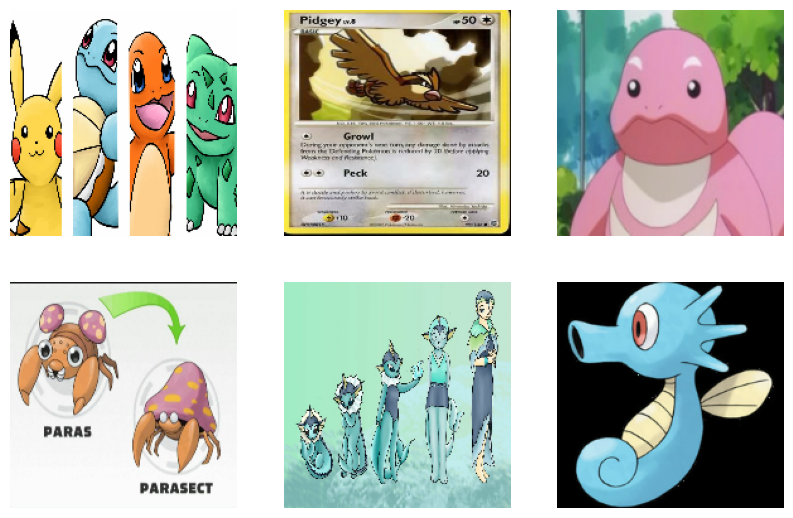

In [6]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

In [7]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=149,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [8]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(149, activation='softmax'))

In [9]:
demo_resnet_model.compile(optimizer=SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10


2024-05-04 14:03:01.303542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:03:01.372239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:03:01.372267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:10 - loss: 5.4876 - accuracy: 0.0000e+00

2024-05-04 14:03:03.804663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 3:06 - loss: 5.5231 - accuracy: 0.0000e+00

2024-05-04 14:03:04.531640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 2:57 - loss: 5.3151 - accuracy: 0.0208

2024-05-04 14:03:12.214065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 2:53 - loss: 5.2663 - accuracy: 0.0281

2024-05-04 14:03:15.748841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:28 - loss: 5.0373 - accuracy: 0.0578

2024-05-04 14:03:38.366143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:27 - loss: 5.0411 - accuracy: 0.0567

2024-05-04 14:03:39.054897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:21 - loss: 4.9968 - accuracy: 0.0615

2024-05-04 14:03:44.495329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:14 - loss: 4.9716 - accuracy: 0.0655

2024-05-04 14:03:51.209434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:55 - loss: 4.8711 - accuracy: 0.0812

2024-05-04 14:04:11.125303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:49 - loss: 4.8325 - accuracy: 0.0840

2024-05-04 14:04:20.798451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:47 - loss: 4.8161 - accuracy: 0.0859

2024-05-04 14:04:24.076163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:38 - loss: 4.7789 - accuracy: 0.0921

2024-05-04 14:04:33.895024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:33 - loss: 4.7585 - accuracy: 0.0944

2024-05-04 14:04:38.372607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:31 - loss: 4.7520 - accuracy: 0.0953

2024-05-04 14:04:39.662346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:30 - loss: 4.7477 - accuracy: 0.0960

2024-05-04 14:04:40.954791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:16 - loss: 4.6929 - accuracy: 0.1032

2024-05-04 14:04:52.807638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:10 - loss: 4.6719 - accuracy: 0.1064

2024-05-04 14:04:58.414902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:05 - loss: 4.6532 - accuracy: 0.1084

2024-05-04 14:05:02.959941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:05:02.959961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 57s - loss: 4.6235 - accuracy: 0.1130

2024-05-04 14:05:10.864630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 53s - loss: 4.6122 - accuracy: 0.1143

2024-05-04 14:05:14.125912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 33s - loss: 4.5477 - accuracy: 0.1224

2024-05-04 14:05:32.106761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 30s - loss: 4.5371 - accuracy: 0.1233

2024-05-04 14:05:35.525698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 22s - loss: 4.5143 - accuracy: 0.1266

2024-05-04 14:05:43.648496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 4.4774 - accuracy: 0.1299

2024-05-04 14:05:53.556917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 4.4419 - accuracy: 0.1352

2024-05-04 14:06:07.487819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:09.457361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:12.057398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:14.715656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:18.279129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:31.680320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:31.680400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:06:32.289258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:32.948149: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 230s 853ms/step - loss: 4.4419 - accuracy: 0.1352 - val_loss: 3.9065 - val_accuracy: 0.1976
Epoch 2/10


2024-05-04 14:06:49.297315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:49.364805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:06:49.364819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 2:53 - loss: 3.7502 - accuracy: 0.2292

2024-05-04 14:06:51.547147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 2:52 - loss: 3.7360 - accuracy: 0.2109

2024-05-04 14:06:52.257559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 3:18 - loss: 3.6024 - accuracy: 0.2438

2024-05-04 14:07:01.276167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 3:06 - loss: 3.5537 - accuracy: 0.2500

2024-05-04 14:07:04.681314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:25 - loss: 3.5122 - accuracy: 0.2724

2024-05-04 14:07:25.524983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:24 - loss: 3.5115 - accuracy: 0.2731

2024-05-04 14:07:26.200322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:18 - loss: 3.5268 - accuracy: 0.2686

2024-05-04 14:07:31.400517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:10 - loss: 3.5006 - accuracy: 0.2713

2024-05-04 14:07:37.767869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:50 - loss: 3.4780 - accuracy: 0.2753

2024-05-04 14:07:55.892115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:44 - loss: 3.4633 - accuracy: 0.2776

2024-05-04 14:08:04.927557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:41 - loss: 3.4610 - accuracy: 0.2786

2024-05-04 14:08:07.455593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:32 - loss: 3.4421 - accuracy: 0.2810

2024-05-04 14:08:15.995944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:27 - loss: 3.4262 - accuracy: 0.2845

2024-05-04 14:08:20.427142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:26 - loss: 3.4216 - accuracy: 0.2856

2024-05-04 14:08:21.675546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:24 - loss: 3.4163 - accuracy: 0.2864

2024-05-04 14:08:22.969738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:13 - loss: 3.3835 - accuracy: 0.2902

2024-05-04 14:08:35.869408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:07 - loss: 3.3742 - accuracy: 0.2907

2024-05-04 14:08:41.411798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:03 - loss: 3.3592 - accuracy: 0.2915

2024-05-04 14:08:47.111467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:08:47.111501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 55s - loss: 3.3415 - accuracy: 0.2934

2024-05-04 14:08:55.866774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 52s - loss: 3.3402 - accuracy: 0.2944

2024-05-04 14:08:59.608882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 33s - loss: 3.3056 - accuracy: 0.3020

2024-05-04 14:09:19.246600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 30s - loss: 3.3024 - accuracy: 0.3020

2024-05-04 14:09:22.563866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 21s - loss: 3.2876 - accuracy: 0.3041

2024-05-04 14:09:30.549592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 3.2669 - accuracy: 0.3056

2024-05-04 14:09:40.896706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 3.2422 - accuracy: 0.3111

2024-05-04 14:09:55.058608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:09:57.169158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:00.134056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:02.952363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:06.913101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:21.790572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:21.790611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:10:22.393025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:23.076201: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 230s 861ms/step - loss: 3.2422 - accuracy: 0.3111 - val_loss: 3.1700 - val_accuracy: 0.3031
Epoch 3/10


2024-05-04 14:10:39.484142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:39.551035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:10:39.551051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 5:41 - loss: 2.7664 - accuracy: 0.4167

2024-05-04 14:10:43.008390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 6:16 - loss: 2.7939 - accuracy: 0.3828

2024-05-04 14:10:44.770333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 4:00 - loss: 2.6592 - accuracy: 0.4187

2024-05-04 14:10:53.756337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 3:36 - loss: 2.6515 - accuracy: 0.4234

2024-05-04 14:10:57.135211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:38 - loss: 2.6290 - accuracy: 0.4346

2024-05-04 14:11:18.823351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:37 - loss: 2.6360 - accuracy: 0.4323

2024-05-04 14:11:19.530478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:30 - loss: 2.6346 - accuracy: 0.4355

2024-05-04 14:11:25.319123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:23 - loss: 2.6362 - accuracy: 0.4345

2024-05-04 14:11:32.531236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 2:00 - loss: 2.6221 - accuracy: 0.4338

2024-05-04 14:11:51.651739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:54 - loss: 2.6058 - accuracy: 0.4367

2024-05-04 14:12:02.589972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:51 - loss: 2.6061 - accuracy: 0.4364

2024-05-04 14:12:05.594566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:41 - loss: 2.6037 - accuracy: 0.4348

2024-05-04 14:12:14.261248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:36 - loss: 2.5883 - accuracy: 0.4354

2024-05-04 14:12:19.490527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:34 - loss: 2.5814 - accuracy: 0.4370

2024-05-04 14:12:20.889554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:33 - loss: 2.5763 - accuracy: 0.4379

2024-05-04 14:12:22.367834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:20 - loss: 2.5587 - accuracy: 0.4409

2024-05-04 14:12:36.141137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:14 - loss: 2.5538 - accuracy: 0.4411

2024-05-04 14:12:42.131276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:09 - loss: 2.5497 - accuracy: 0.4426

2024-05-04 14:12:47.705058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:12:47.705153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 1:00 - loss: 2.5436 - accuracy: 0.4429

2024-05-04 14:12:57.154234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 57s - loss: 2.5398 - accuracy: 0.4436

2024-05-04 14:13:01.045477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 36s - loss: 2.5216 - accuracy: 0.4494

2024-05-04 14:13:23.777232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 33s - loss: 2.5211 - accuracy: 0.4497

2024-05-04 14:13:27.376980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 24s - loss: 2.5148 - accuracy: 0.4516

2024-05-04 14:13:37.225339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 12s - loss: 2.5001 - accuracy: 0.4535

2024-05-04 14:13:47.885581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 2.4868 - accuracy: 0.4583

2024-05-04 14:14:01.930255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:04.162338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:07.143509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:10.173615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:13.684207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:28.774133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:28.774165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:14:29.491449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:30.214529: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 256s 958ms/step - loss: 2.4868 - accuracy: 0.4583 - val_loss: 2.7113 - val_accuracy: 0.3984
Epoch 4/10


2024-05-04 14:14:55.593456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:55.672086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:14:55.672111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:52 - loss: 2.1104 - accuracy: 0.5104

2024-05-04 14:14:58.643099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 3:41 - loss: 2.2175 - accuracy: 0.5000

2024-05-04 14:14:59.470212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 3:29 - loss: 2.1664 - accuracy: 0.5354

2024-05-04 14:15:08.490866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 3:32 - loss: 2.1327 - accuracy: 0.5422

2024-05-04 14:15:13.360287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:52 - loss: 2.1111 - accuracy: 0.5395

2024-05-04 14:15:38.772227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:51 - loss: 2.1059 - accuracy: 0.5417

2024-05-04 14:15:39.493986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:40 - loss: 2.1153 - accuracy: 0.5368

2024-05-04 14:15:44.799063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:30 - loss: 2.1027 - accuracy: 0.5378

2024-05-04 14:15:51.694908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 2:15 - loss: 2.0836 - accuracy: 0.5387

2024-05-04 14:16:17.256374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 2:03 - loss: 2.0859 - accuracy: 0.5393

2024-05-04 14:16:25.515235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:59 - loss: 2.0836 - accuracy: 0.5407

2024-05-04 14:16:28.151654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:51 - loss: 2.0850 - accuracy: 0.5392

2024-05-04 14:16:40.351298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:46 - loss: 2.0760 - accuracy: 0.5404

2024-05-04 14:16:46.954824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:45 - loss: 2.0715 - accuracy: 0.5412

2024-05-04 14:16:48.489083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:43 - loss: 2.0709 - accuracy: 0.5415

2024-05-04 14:16:50.305867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:28 - loss: 2.0621 - accuracy: 0.5409

2024-05-04 14:17:04.337318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:22 - loss: 2.0594 - accuracy: 0.5397

2024-05-04 14:17:11.009137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:15 - loss: 2.0589 - accuracy: 0.5385

2024-05-04 14:17:15.676900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:17:15.676915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 1:05 - loss: 2.0544 - accuracy: 0.5385

2024-05-04 14:17:23.950790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 1:01 - loss: 2.0593 - accuracy: 0.5375

2024-05-04 14:17:27.733058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 38s - loss: 2.0454 - accuracy: 0.5424

2024-05-04 14:17:47.409355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 34s - loss: 2.0472 - accuracy: 0.5420

2024-05-04 14:17:50.800958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 24s - loss: 2.0442 - accuracy: 0.5426

2024-05-04 14:17:59.174249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 13s - loss: 2.0375 - accuracy: 0.5436

2024-05-04 14:18:10.880273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 2.0260 - accuracy: 0.5470

2024-05-04 14:18:23.763499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:25.709669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:28.272111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:30.885620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:34.131863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:46.885061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:46.885086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:18:47.484664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:18:48.158211: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 249s 931ms/step - loss: 2.0260 - accuracy: 0.5470 - val_loss: 2.4237 - val_accuracy: 0.4364
Epoch 5/10


2024-05-04 14:19:04.697083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:19:04.765119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:19:04.765137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 2:54 - loss: 1.9594 - accuracy: 0.5521

2024-05-04 14:19:06.981966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 2:56 - loss: 1.9472 - accuracy: 0.5625

2024-05-04 14:19:07.721172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 2:46 - loss: 1.8577 - accuracy: 0.5833

2024-05-04 14:19:14.909970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 2:42 - loss: 1.8191 - accuracy: 0.5859

2024-05-04 14:19:18.244096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:18 - loss: 1.7867 - accuracy: 0.6050

2024-05-04 14:19:39.351502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:18 - loss: 1.7897 - accuracy: 0.6030

2024-05-04 14:19:40.033858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:13 - loss: 1.7756 - accuracy: 0.6084

2024-05-04 14:19:45.337390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:06 - loss: 1.7726 - accuracy: 0.6120

2024-05-04 14:19:51.834206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:48 - loss: 1.7628 - accuracy: 0.6109

2024-05-04 14:20:10.280132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:40 - loss: 1.7656 - accuracy: 0.6113

2024-05-04 14:20:18.012768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:38 - loss: 1.7739 - accuracy: 0.6083

2024-05-04 14:20:20.543042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:30 - loss: 1.7534 - accuracy: 0.6129

2024-05-04 14:20:29.236197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:25 - loss: 1.7486 - accuracy: 0.6128

2024-05-04 14:20:33.846102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:24 - loss: 1.7454 - accuracy: 0.6135

2024-05-04 14:20:35.142757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:22 - loss: 1.7437 - accuracy: 0.6138

2024-05-04 14:20:36.425990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:11 - loss: 1.7453 - accuracy: 0.6116

2024-05-04 14:20:48.179181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:05 - loss: 1.7395 - accuracy: 0.6120

2024-05-04 14:20:53.507154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:01 - loss: 1.7387 - accuracy: 0.6118

2024-05-04 14:20:57.960562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:20:57.960589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 53s - loss: 1.7434 - accuracy: 0.6103

2024-05-04 14:21:05.795122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 50s - loss: 1.7491 - accuracy: 0.6087

2024-05-04 14:21:09.079617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 31s - loss: 1.7391 - accuracy: 0.6111

2024-05-04 14:21:27.308660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 28s - loss: 1.7417 - accuracy: 0.6092

2024-05-04 14:21:30.503583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 20s - loss: 1.7392 - accuracy: 0.6097

2024-05-04 14:21:38.258739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.7316 - accuracy: 0.6110

2024-05-04 14:21:48.025373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 1.7262 - accuracy: 0.6128

2024-05-04 14:22:01.206427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:03.183440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:05.784232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:08.397030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:11.645354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:25.860975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:25.861003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:22:26.518140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:27.238187: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 219s 821ms/step - loss: 1.7262 - accuracy: 0.6128 - val_loss: 2.2992 - val_accuracy: 0.4622
Epoch 6/10


2024-05-04 14:22:44.189481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:44.258679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:22:44.258696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:01 - loss: 1.9657 - accuracy: 0.5104

2024-05-04 14:22:46.578290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 2:59 - loss: 1.8676 - accuracy: 0.5547

2024-05-04 14:22:47.304280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 2:48 - loss: 1.5549 - accuracy: 0.6521

2024-05-04 14:22:54.564867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 2:46 - loss: 1.5482 - accuracy: 0.6516

2024-05-04 14:22:58.094887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:23 - loss: 1.5309 - accuracy: 0.6592

2024-05-04 14:23:20.013506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:22 - loss: 1.5364 - accuracy: 0.6580

2024-05-04 14:23:20.697729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:17 - loss: 1.5415 - accuracy: 0.6578

2024-05-04 14:23:26.032823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:10 - loss: 1.5361 - accuracy: 0.6580

2024-05-04 14:23:32.681781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:52 - loss: 1.5215 - accuracy: 0.6597

2024-05-04 14:23:52.153482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:44 - loss: 1.5327 - accuracy: 0.6537

2024-05-04 14:24:00.318157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:42 - loss: 1.5366 - accuracy: 0.6525

2024-05-04 14:24:02.949985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:33 - loss: 1.5362 - accuracy: 0.6553

2024-05-04 14:24:11.634269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:28 - loss: 1.5316 - accuracy: 0.6551

2024-05-04 14:24:16.242004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:26 - loss: 1.5287 - accuracy: 0.6551

2024-05-04 14:24:17.523718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:25 - loss: 1.5287 - accuracy: 0.6549

2024-05-04 14:24:18.877969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:13 - loss: 1.5111 - accuracy: 0.6574

2024-05-04 14:24:31.117827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:08 - loss: 1.5156 - accuracy: 0.6572

2024-05-04 14:24:36.563326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:03 - loss: 1.5251 - accuracy: 0.6544

2024-05-04 14:24:41.157112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:24:41.157125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 55s - loss: 1.5208 - accuracy: 0.6552

2024-05-04 14:24:49.542388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 52s - loss: 1.5237 - accuracy: 0.6543

2024-05-04 14:24:52.930601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 33s - loss: 1.5212 - accuracy: 0.6557

2024-05-04 14:25:12.012021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 29s - loss: 1.5232 - accuracy: 0.6546

2024-05-04 14:25:15.382569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 21s - loss: 1.5260 - accuracy: 0.6543

2024-05-04 14:25:23.396968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.5187 - accuracy: 0.6538

2024-05-04 14:25:33.271312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 1.5138 - accuracy: 0.6552

2024-05-04 14:25:46.605134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:25:48.689086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:25:51.357738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:25:54.063565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:25:57.431946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:26:10.827813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:26:10.827844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:26:11.477128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:26:12.154357: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 225s 841ms/step - loss: 1.5138 - accuracy: 0.6552 - val_loss: 2.1635 - val_accuracy: 0.4805
Epoch 7/10


2024-05-04 14:26:29.158628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:26:29.227056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:26:29.227080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 2:59 - loss: 1.3987 - accuracy: 0.6667

2024-05-04 14:26:31.503636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 2:58 - loss: 1.5171 - accuracy: 0.6484

2024-05-04 14:26:32.247904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 2:55 - loss: 1.3241 - accuracy: 0.7063

2024-05-04 14:26:39.896833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 2:50 - loss: 1.3292 - accuracy: 0.7016

2024-05-04 14:26:43.381097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:25 - loss: 1.3806 - accuracy: 0.6828

2024-05-04 14:27:05.459311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:24 - loss: 1.3836 - accuracy: 0.6823

2024-05-04 14:27:06.145114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:18 - loss: 1.3681 - accuracy: 0.6910

2024-05-04 14:27:11.483254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:11 - loss: 1.3572 - accuracy: 0.6940

2024-05-04 14:27:18.118264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:52 - loss: 1.3556 - accuracy: 0.6944

2024-05-04 14:27:36.719062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:43 - loss: 1.3527 - accuracy: 0.6948

2024-05-04 14:27:44.624221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:41 - loss: 1.3545 - accuracy: 0.6945

2024-05-04 14:27:47.305344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:32 - loss: 1.3507 - accuracy: 0.6945

2024-05-04 14:27:56.076365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:28 - loss: 1.3471 - accuracy: 0.6944

2024-05-04 14:28:01.313368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:27 - loss: 1.3455 - accuracy: 0.6945

2024-05-04 14:28:02.690769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:25 - loss: 1.3420 - accuracy: 0.6951

2024-05-04 14:28:04.033364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:13 - loss: 1.3404 - accuracy: 0.6928

2024-05-04 14:28:16.132005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:08 - loss: 1.3411 - accuracy: 0.6911

2024-05-04 14:28:21.545845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:03 - loss: 1.3480 - accuracy: 0.6898

2024-05-04 14:28:26.085703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:28:26.085724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 55s - loss: 1.3451 - accuracy: 0.6910

2024-05-04 14:28:34.171808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 51s - loss: 1.3497 - accuracy: 0.6910

2024-05-04 14:28:37.567406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 32s - loss: 1.3564 - accuracy: 0.6875

2024-05-04 14:28:56.222998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 29s - loss: 1.3559 - accuracy: 0.6882

2024-05-04 14:28:59.722326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 21s - loss: 1.3516 - accuracy: 0.6884

2024-05-04 14:29:08.156498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.3439 - accuracy: 0.6894

2024-05-04 14:29:18.555049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 1.3436 - accuracy: 0.6902

2024-05-04 14:29:31.917333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:33.987989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:36.680967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:39.379723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:43.039070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:56.361854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:56.361916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:29:56.998634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:29:57.775151: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 226s 845ms/step - loss: 1.3436 - accuracy: 0.6902 - val_loss: 2.1263 - val_accuracy: 0.4885
Epoch 8/10


2024-05-04 14:30:14.924615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:30:14.991605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:30:14.991623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:21 - loss: 1.4696 - accuracy: 0.5938

2024-05-04 14:30:17.395993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 3:15 - loss: 1.3973 - accuracy: 0.6328

2024-05-04 14:30:18.179034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 3:01 - loss: 1.2232 - accuracy: 0.7250

2024-05-04 14:30:25.958155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 2:55 - loss: 1.1871 - accuracy: 0.7406

2024-05-04 14:30:29.450379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:26 - loss: 1.2359 - accuracy: 0.7252

2024-05-04 14:30:51.355798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:25 - loss: 1.2374 - accuracy: 0.7257

2024-05-04 14:30:52.063356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:19 - loss: 1.2178 - accuracy: 0.7278

2024-05-04 14:30:57.568001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:14 - loss: 1.2123 - accuracy: 0.7296

2024-05-04 14:31:04.790502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:54 - loss: 1.2011 - accuracy: 0.7387

2024-05-04 14:31:23.538652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:45 - loss: 1.2139 - accuracy: 0.7366

2024-05-04 14:31:31.597221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:43 - loss: 1.2108 - accuracy: 0.7371

2024-05-04 14:31:34.416831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:34 - loss: 1.2032 - accuracy: 0.7359

2024-05-04 14:31:43.237641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:29 - loss: 1.2087 - accuracy: 0.7337

2024-05-04 14:31:47.909321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:27 - loss: 1.2082 - accuracy: 0.7337

2024-05-04 14:31:49.285050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:26 - loss: 1.2044 - accuracy: 0.7348

2024-05-04 14:31:50.685417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:14 - loss: 1.2015 - accuracy: 0.7328

2024-05-04 14:32:03.031200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:08 - loss: 1.1999 - accuracy: 0.7334

2024-05-04 14:32:08.557880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:04 - loss: 1.2065 - accuracy: 0.7328

2024-05-04 14:32:13.195888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:32:13.195905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 55s - loss: 1.2087 - accuracy: 0.7328

2024-05-04 14:32:21.288275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 52s - loss: 1.2135 - accuracy: 0.7311

2024-05-04 14:32:24.650347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 33s - loss: 1.2116 - accuracy: 0.7308

2024-05-04 14:32:43.677816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 29s - loss: 1.2144 - accuracy: 0.7302

2024-05-04 14:32:47.045084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 21s - loss: 1.2151 - accuracy: 0.7282

2024-05-04 14:32:55.072205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.2109 - accuracy: 0.7278

2024-05-04 14:33:05.739525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 1.2085 - accuracy: 0.7296

2024-05-04 14:33:19.161175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:21.203618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:23.921186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:26.689962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:30.089767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:43.582639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:43.582692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:33:44.254288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:33:44.995972: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 228s 854ms/step - loss: 1.2085 - accuracy: 0.7296 - val_loss: 2.0539 - val_accuracy: 0.4941
Epoch 9/10


2024-05-04 14:34:03.122622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:34:03.200101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:34:03.200113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:23 - loss: 1.1006 - accuracy: 0.7812

2024-05-04 14:34:06.082432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 3:17 - loss: 1.0968 - accuracy: 0.7578

2024-05-04 14:34:06.873697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 2:59 - loss: 1.1115 - accuracy: 0.7625

2024-05-04 14:34:14.523142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 3:06 - loss: 1.0785 - accuracy: 0.7719

2024-05-04 14:34:18.934964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:33 - loss: 1.1198 - accuracy: 0.7571

2024-05-04 14:34:41.875127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:33 - loss: 1.1142 - accuracy: 0.7587

2024-05-04 14:34:42.620996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:26 - loss: 1.1114 - accuracy: 0.7601

2024-05-04 14:34:48.024487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:17 - loss: 1.1083 - accuracy: 0.7604

2024-05-04 14:34:54.696560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 1:57 - loss: 1.1026 - accuracy: 0.7625

2024-05-04 14:35:14.001260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:48 - loss: 1.1005 - accuracy: 0.7645

2024-05-04 14:35:21.986442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:45 - loss: 1.0959 - accuracy: 0.7659

2024-05-04 14:35:24.622931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:36 - loss: 1.0932 - accuracy: 0.7667

2024-05-04 14:35:33.676690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:31 - loss: 1.0947 - accuracy: 0.7645

2024-05-04 14:35:39.333150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:30 - loss: 1.0977 - accuracy: 0.7634

2024-05-04 14:35:40.748465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:29 - loss: 1.0944 - accuracy: 0.7636

2024-05-04 14:35:42.113868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:16 - loss: 1.0900 - accuracy: 0.7638

2024-05-04 14:35:54.531213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:10 - loss: 1.0951 - accuracy: 0.7620

2024-05-04 14:36:00.419254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:05 - loss: 1.0909 - accuracy: 0.7639

2024-05-04 14:36:05.071568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:36:05.071588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 57s - loss: 1.0977 - accuracy: 0.7608

2024-05-04 14:36:13.271029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 53s - loss: 1.0999 - accuracy: 0.7600

2024-05-04 14:36:16.675181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 34s - loss: 1.1022 - accuracy: 0.7576

2024-05-04 14:36:35.478469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 30s - loss: 1.1045 - accuracy: 0.7576

2024-05-04 14:36:38.844976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 22s - loss: 1.1084 - accuracy: 0.7551

2024-05-04 14:36:47.175036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.1008 - accuracy: 0.7567

2024-05-04 14:36:58.466484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 1.0966 - accuracy: 0.7582

2024-05-04 14:37:12.385807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:14.572970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:17.338328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:20.140530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:23.561853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:37.024924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:37.024955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:37:37.717538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:38.670880: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 233s 872ms/step - loss: 1.0966 - accuracy: 0.7582 - val_loss: 1.9930 - val_accuracy: 0.5143
Epoch 10/10


2024-05-04 14:37:56.550634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:56.618323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:37:56.618341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


  3/267 [..............................] - ETA: 3:18 - loss: 0.9369 - accuracy: 0.7708

2024-05-04 14:37:59.151244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/267 [..............................] - ETA: 3:18 - loss: 0.9685 - accuracy: 0.7812

2024-05-04 14:37:59.974332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/267 [>.............................] - ETA: 3:02 - loss: 0.9406 - accuracy: 0.8021

2024-05-04 14:38:07.812334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/267 [=>............................] - ETA: 3:05 - loss: 0.9686 - accuracy: 0.8031

2024-05-04 14:38:12.045918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/267 [====>.........................] - ETA: 2:39 - loss: 1.0137 - accuracy: 0.7871

2024-05-04 14:38:36.512595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/267 [=====>........................] - ETA: 2:39 - loss: 1.0142 - accuracy: 0.7859

2024-05-04 14:38:37.269391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/267 [=====>........................] - ETA: 2:33 - loss: 1.0049 - accuracy: 0.7848

2024-05-04 14:38:43.219792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/267 [=======>......................] - ETA: 2:24 - loss: 0.9942 - accuracy: 0.7873

2024-05-04 14:38:50.126734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: bKGD: invalid


100/267 [==========>...................] - ETA: 2:00 - loss: 0.9911 - accuracy: 0.7894

2024-05-04 14:39:09.244177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/267 [===========>..................] - ETA: 1:51 - loss: 0.9985 - accuracy: 0.7874

2024-05-04 14:39:17.316114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/267 [============>.................] - ETA: 1:48 - loss: 0.9975 - accuracy: 0.7869

2024-05-04 14:39:20.093783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/267 [=============>................] - ETA: 1:38 - loss: 0.9894 - accuracy: 0.7888

2024-05-04 14:39:29.017824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/267 [==============>...............] - ETA: 1:33 - loss: 0.9947 - accuracy: 0.7858

2024-05-04 14:39:34.017752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/267 [==============>...............] - ETA: 1:32 - loss: 0.9928 - accuracy: 0.7862

2024-05-04 14:39:35.386476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/267 [==============>...............] - ETA: 1:30 - loss: 0.9919 - accuracy: 0.7862

2024-05-04 14:39:36.737273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/267 [================>.............] - ETA: 1:17 - loss: 0.9933 - accuracy: 0.7832

2024-05-04 14:39:49.092462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/267 [=================>............] - ETA: 1:11 - loss: 0.9961 - accuracy: 0.7833

2024-05-04 14:39:54.529620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/267 [==================>...........] - ETA: 1:06 - loss: 0.9992 - accuracy: 0.7802

2024-05-04 14:39:59.361702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:39:59.361739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


185/267 [===================>..........] - ETA: 57s - loss: 0.9997 - accuracy: 0.7809

2024-05-04 14:40:07.552651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/267 [====================>.........] - ETA: 54s - loss: 1.0030 - accuracy: 0.7793

2024-05-04 14:40:10.901419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/267 [=======================>......] - ETA: 34s - loss: 1.0005 - accuracy: 0.7798

2024-05-04 14:40:29.525147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


223/267 [========================>.....] - ETA: 30s - loss: 1.0054 - accuracy: 0.7789

2024-05-04 14:40:32.836409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/267 [=========================>....] - ETA: 22s - loss: 1.0084 - accuracy: 0.7765

2024-05-04 14:40:41.541720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/267 [===========================>..] - ETA: 11s - loss: 1.0007 - accuracy: 0.7781

2024-05-04 14:40:51.613431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/267 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.7784

2024-05-04 14:41:05.640128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:07.703307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:10.587107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:13.495804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:17.181210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:35.246710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:35.246790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-05-04 14:41:36.081290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-05-04 14:41:36.981278: W tensorflow/core/lib/png/png_io.cc:88] PN

267/267 [==============================] - 240s 898ms/step - loss: 0.9992 - accuracy: 0.7784 - val_loss: 1.9506 - val_accuracy: 0.5148


[0.19755983352661133, 0.30314406752586365, 0.3984045088291168, 0.43641483783721924, 0.4622243046760559, 0.48052558302879333, 0.48850303888320923, 0.49413421750068665, 0.5143125057220459, 0.5147817730903625]


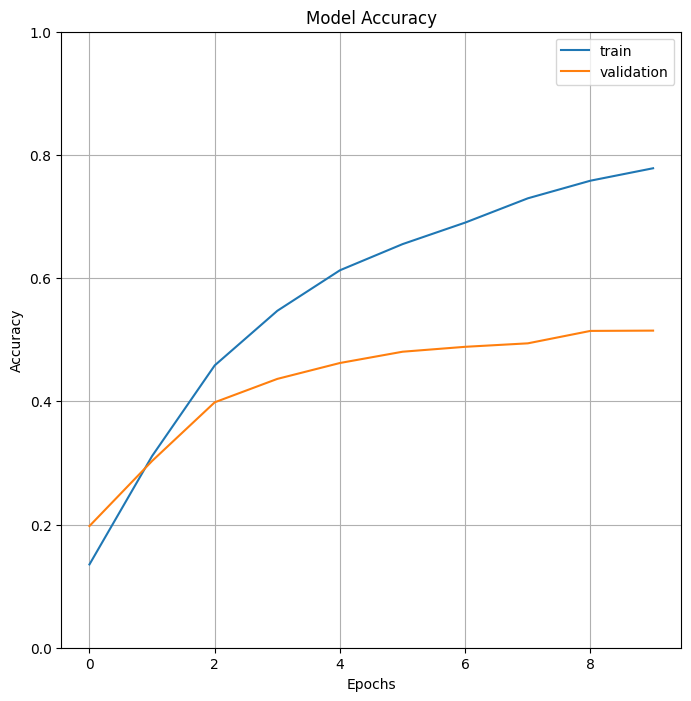

In [12]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.0,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

print(history.history['val_accuracy'])